In [14]:
from config import *

In [15]:
print(f'{year}年{month}月')

2020年4月


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [17]:
conn=db.get_conn()

In [18]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
stat_data

,Month,Salary_Mean,Salary_Median,JD_Count,HeadCount
0,201906,13387,12500,95375,306980
1,201907,13600,12500,91895,293948
2,201908,13785,12500,91631,289118
3,201909,13817,12500,87938,277901
4,201910,13730,12500,84654,269005
5,201911,13857,12500,81763,262185
6,201912,13938,12500,81142,260002
7,202001,14008,12500,75301,242944
8,202002,14096,12500,69030,223830
9,202003,14220,12500,63574,204853


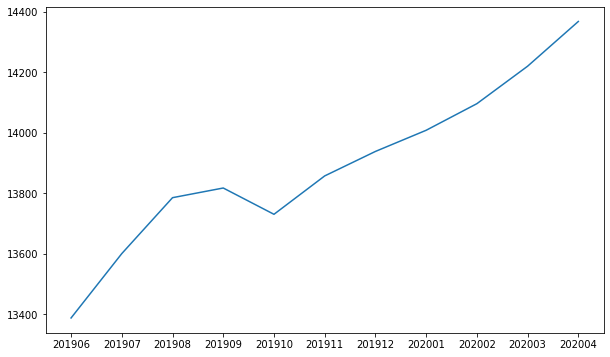

In [19]:
plt.figure(figsize=(10,6))
plt.plot("Month","Salary_Mean",data=stat_data)
plt.show()

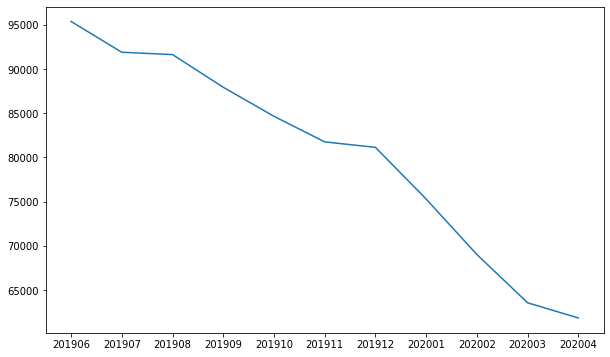

In [20]:
plt.figure(figsize=(10,6))
plt.plot("Month","JD_Count",data=stat_data)
plt.show()

[1.0]


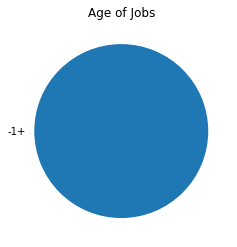

In [8]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照职能统计平均工资

In [9]:
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=db.get_conn())

In [10]:
data_original.shape

(61872, 122)

In [11]:
data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

In [12]:
data_career['salary']=data_career['salary'].astype(int)

In [13]:
data_career.sort_values(by='salary', ascending=False)

,salary
career,
光学算法工程师,30666
CT重建,26500
系统架构师,22855
机器学习,22601
规划算法工程师,22124
adas,20456
SLAM,20329
图像算法,19604
算法工程师,18343
